1. Phân tích dữ liệu cơ bản

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("../data/sp500.csv", decimal=".")


In [6]:
data.head(2)

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Co.,Industrials,141.14,2.12,20.33,6.900,26.668,107.15,143.37,92.345,8.121,2.95,5.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ABT,Abbott Laboratories,Health Care,39.60,1.82,25.93,1.529,15.573,32.70,40.49,59.477,4.359,2.74,2.55,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [7]:
data.dtypes # kiển tra kiểu dl

Symbol             object
Name               object
Sector             object
Price             float64
Dividend Yield    float64
Price/Earnings    float64
Earnings/Share    float64
Book Value        float64
52 week low       float64
52 week high      float64
Market Cap        float64
EBITDA            float64
Price/Sales       float64
Price/Book        float64
SEC Filings        object
dtype: object

In [8]:
data.isnull().sum() # kiểm tra các giá trị null trong bảng

Symbol             0
Name               0
Sector             0
Price              0
Dividend Yield    76
Price/Earnings    20
Earnings/Share     1
Book Value         1
52 week low        1
52 week high       1
Market Cap         4
EBITDA             1
Price/Sales        4
Price/Book        14
SEC Filings        0
dtype: int64

In [9]:
data.describe() # thống kê các giá trị trong bảng

,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book
count,500.00000,424.000000,480.000000,499.000000,499.000000,499.000000,499.000000,496.000000,499.000000,496.000000,486.000000
mean,77.36860,2.131439,29.887792,3.564842,301.611301,59.205015,84.668283,35.348525,3.700364,2.782359,4.620514
std,87.59694,1.321017,70.163577,4.049497,6195.727862,62.279565,98.995689,54.839169,6.669021,2.529481,10.578663
min,0.00000,0.040000,2.520000,-10.693000,-51.275000,3.800000,6.100000,0.208500,-0.331300,0.000000,0.000000
25%,38.74500,1.260000,15.570000,1.652000,10.836500,30.985000,42.500000,9.859250,0.867800,1.220000,1.802500
50%,58.35500,1.890000,20.005000,2.841000,19.098000,45.610000,63.560000,17.444500,1.636000,2.005000,3.125000
75%,86.68000,2.820000,26.627500,4.435000,31.386500,66.570000,91.295000,34.653250,3.793500,3.377500,4.730000
max,1197.12000,10.640000,1329.620000,41.727000,138425.453100,787.000000,1378.960000,529.000000,60.657000,17.840000,213.740000


2. Tính toán các chỉ số cơ bản

In [11]:
data["P/E to Dividend"] = data["Price/Earnings"] / data["Dividend Yield"] # tạo cột mới là tỷ lệ giữa Price/Earnings và Dividend Yield

min_value= float(data["P/E to Dividend"].min())
max_value= float(data["P/E to Dividend"].max())
mean_value= float(data["P/E to Dividend"].mean())

print("Max value: ", round(max_value,2))
print("Min value: ", round(min_value,2))
print("Mean value: ", round(mean_value,2))

Max value:  686.55
Min value:  1.21
Mean value:  24.13


3. Phân tích ngành nghề:

In [12]:
# tính tổng marketcap theo từng sector
sector_sum = data.groupby("Sector")["Market Cap"].sum()
print(sector_sum)


Sector
Consumer Discretionary         2115.6110
Consumer Discretionary            8.8270
Consumer Staples               1841.4250
Consumer Staples                 18.5570
Energy                         1766.1820
Financials                     2568.4035
Health Care                    2269.1510
Industrials                    1941.7310
Industries                       18.0290
Information Technology         3391.0700
Materials                       593.7740
Telecommunications Services     447.3630
Utilities                       552.7450
Name: Market Cap, dtype: float64


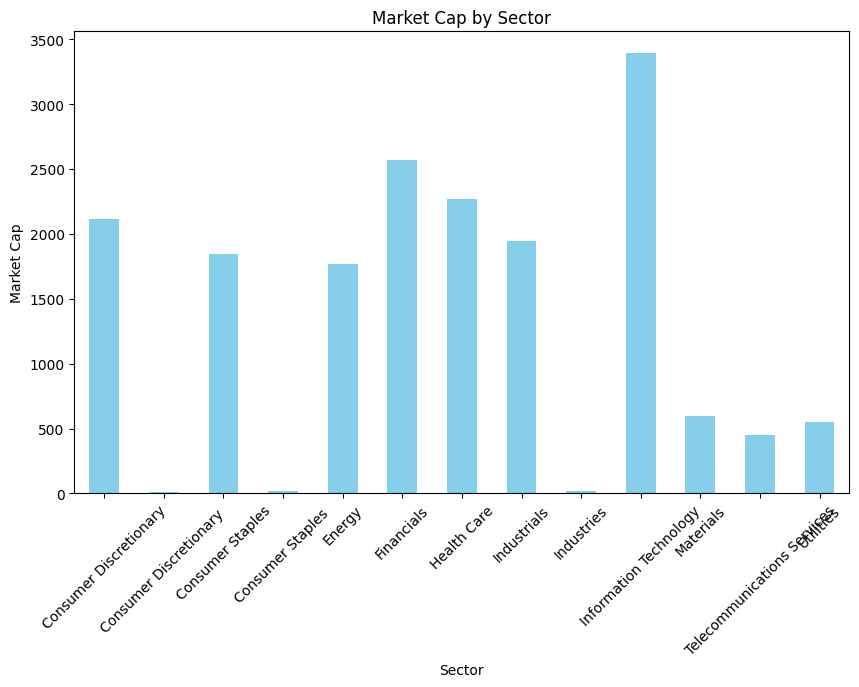

In [13]:
# vẽ biểu đồ cột thể hiện giá trị vốn hóa thị trh thheo ngành

import matplotlib.pyplot as plt
sector_sum.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Market Cap by Sector")
plt.xlabel("Sector")
plt.ylabel("Market Cap")
plt.xticks(rotation=45)
plt.show()

4. Phân tích top 10 công ty có Market Cap lớn nhất


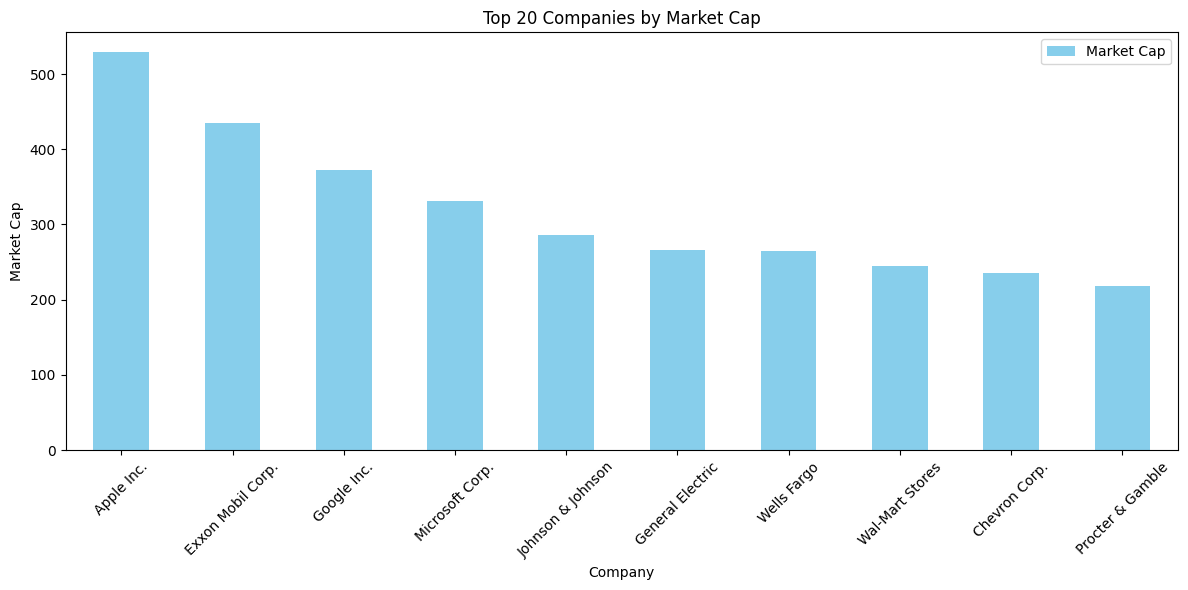

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# Tạo dataFrame gồm tên công ty và giá trị vốn hóa thị trường
df_market_cap = pd.DataFrame({
    'Company': data['Name'],
    'Market Cap': data['Market Cap']
})

df_top = df_market_cap.sort_values(by='Market Cap', ascending=False).head(10)

# Vẽ biểu đồ với bộ dữ liệu đã lọc
df_top.plot(x='Company', y='Market Cap', kind='bar', figsize=(12, 6), color='skyblue')
plt.title(f"Top 20 Companies by Market Cap")
plt.xlabel("Company")
plt.ylabel("Market Cap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







5 Phân tích mối quan hệ giữa P/E và Dividend Yield

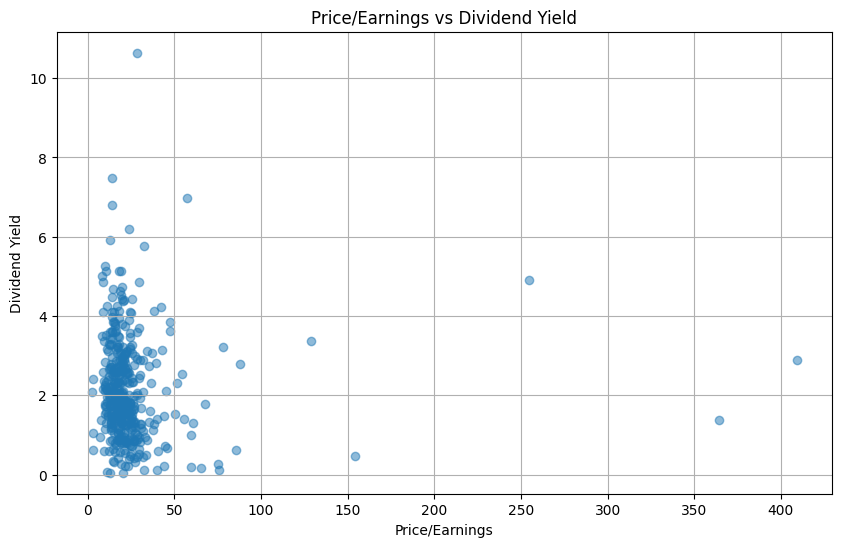

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Tạo khung hình cao 6, rộng 10
# Vẽ biểu đồ phân tán giữa Price/Earnings và Dividend Yield
plt.scatter(data["Price/Earnings"], data["Dividend Yield"], alpha=0.5) # anpha là độ trong suốt của điểm
plt.title("Price/Earnings vs Dividend Yield")
plt.xlabel("Price/Earnings")
plt.ylabel("Dividend Yield")
plt.grid()  
plt.show()



Nhận xét mội qh: Không có mối quan hệ tuyến tính rõ ràng giữa P/E và Dividend Yield trong dữ liệu này. hai chỉ số không tỷ lệ thuận hoặc nghịch mạnh mẽ với nhau.

6. Phân tích biến động giá 52 tuần:


In [ ]:
# tạo cột mới là chênh lệch giữa 52 Week High và 52 Week Low
data["52 Week Range"] = data["52 week high"] - data["52 week low"]
# tìm index của công ty có Range lớn nhất, nhỏ nhất
idx_max = data["52 Week Range"].idxmax()
idx_min = data["52 Week Range"].idxmin()

# lấy thông tin tên công ty và giá trị Range
company_max = data.loc[idx_max, "Name"]
range_max   = data.loc[idx_max, "52 Week Range"]

company_min = data.loc[idx_min, "Name"]
range_min   = data.loc[idx_min, "52 Week Range"]

print(f"Biến động lớn nhất: {company_max} — {range_max:.2f}")
print(f"Biến động nhỏ nhất: {company_min} — {range_min:.2f}")


Biến động lớn nhất: Priceline.com Inc — 591.96
Biến động nhỏ nhất: Hudson City Bancorp — 1.95


7. Xếp hạng công ty theo chỉ số tài chính:


In [40]:
rank_Company= data["Price/Sales"].sort_values(ascending=False).head(5)
print(f"{'Company Name':<29s} : {'Price/Sales'}")

for index, value in rank_Company.items():
    company_name = data.loc[index, "Name"]
    print(f"{company_name:<30s}: {value:.2f}") 


Company Name                  : Price/Sales
Alexion Pharmaceuticals       : 17.84
Facebook Inc                  : 17.42
Vertex Pharmaceuticals Inc    : 16.78
Public Storage                : 14.00
TripAdvisor                   : 13.04



8. Phân tích hệ số tài chính theo ngành:



In [41]:
# Tính toán tb price/Book và price/sales cho từng sector
sector_avg = data.groupby("Sector")[["Price/Book", "Price/Sales"]].mean()
print(sector_avg)

                             Price/Book  Price/Sales
Sector                                              
Consumer Discretionary         4.835065     1.947952
Consumer Discretionary         7.320000     1.670000
Consumer Staples              13.146216     2.168974
Consumer Staples               5.610000     4.100000
Energy                         2.409268     2.529024
Financials                     2.706707     3.841341
Health Care                    4.991296     3.919259
Industrials                    4.511613     1.968889
Industries                     3.170000     3.080000
Information Technology         4.730323     3.971746
Materials                      3.279655     1.708621
Telecommunications Services    5.391667     2.410000
Utilities                      2.425455     1.707273


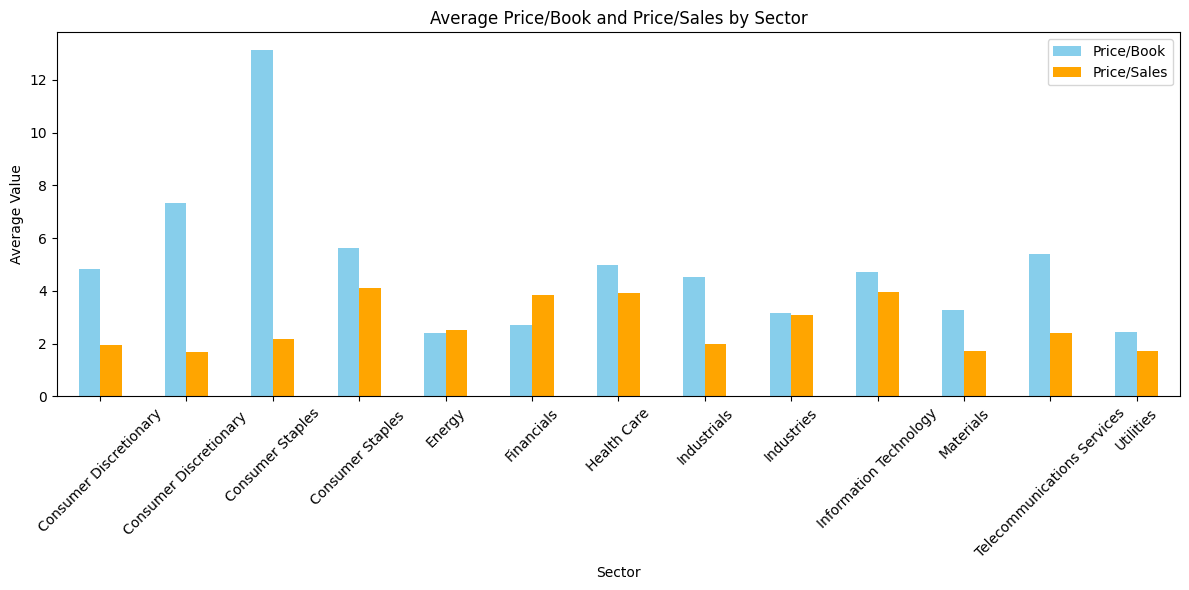

In [42]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ cột cho Price/Book và Price/Sales theo từng sector
sector_avg.plot(kind="bar", figsize=(12, 6), color=["skyblue", "orange"])
plt.title("Average Price/Book and Price/Sales by Sector")
plt.xlabel("Sector")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(["Price/Book", "Price/Sales"])
plt.tight_layout()
plt.show()

9. Phân phối P/E và EBITDA

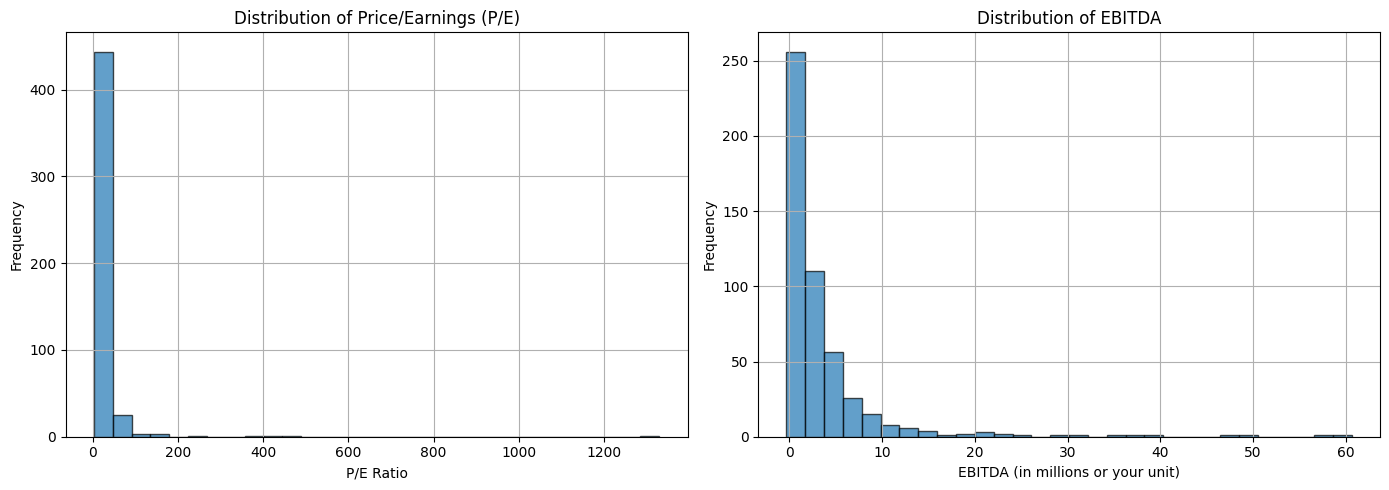

In [46]:
import matplotlib.pyplot as plt

# Giả sử data đã được đọc vào DataFrame 'data'
pe = data["Price/Earnings"].dropna() # Lọc bỏ các giá trị NaN
ebitda = data["EBITDA"].dropna()

# Tạo figure với 2 biểu đồ cột song song
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram của P/E
axes[0].hist(pe, bins=30, edgecolor="black", alpha=0.7)
axes[0].set_title("Distribution of Price/Earnings (P/E)")
axes[0].set_xlabel("P/E Ratio")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Histogram của EBITDA
axes[1].hist(ebitda, bins=30, edgecolor="black", alpha=0.7)
axes[1].set_title("Distribution of EBITDA")
axes[1].set_xlabel("EBITDA (in millions or your unit)")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)  

plt.tight_layout()
plt.show()
